In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm, skew, kurtosis


# Lets simulate dataset

# set random for reproducibility 
np.random.seed(42)  
scores = np.random.normal(65, 13.5, 84) # mean_score,S.D,n_of_students

scores = np.round(scores)

df = pd.DataFrame({'Student_ID': range(1, 84 + 1), 'Score': scores})

df.head(5)


,Student_ID,Score
0,1,72.0
1,2,63.0
2,3,74.0
3,4,86.0
4,5,62.0


In [ ]:
# Lets calculate measures of spread

# Mean
mean_value = df['Score'].mean()
print(round(mean_value))

64


In [ ]:
# Variance
variance_value = df['Score'].var(ddof=0)   # population variance (ddof=0)
print(round(variance_value))

163


In [ ]:

# Standard Deviation
std_dev_value = df['Score'].std(ddof=0)    # population standard deviation
print(round(std_dev_value))

13


In [ ]:
# Relative spread (Coefficient of Variation)

cv = std_dev_value / mean_value   # ratio
cv_percent = cv * 100             # percentage

print("Coefficient of Variation (CV):", cv)
print("Relative Spread (% of mean):", round(cv_percent), "%")


Coefficient of Variation (CV): 0.20057234908048663
Relative Spread (% of mean): 20 %


**Interpretation**

- This means the standard deviation is 20% of the mean. In simple terms, the scores deviate from the average by about one-fifth of the mean.

**What this result is saying about the spread**

In the python class of 84 students, the exam scores vary moderately around the mean. On average, students’ scores deviate from the mean by about 20% of that mean value. This indicates a balanced but noticeable variation in performance some students do better or worse than average, but the group is relatively consistent overall.

**Empirical Interpretation of the result**

- k = no_of_SD

- 1sd = 13 

- 2sd = 26

- 3sd = 39

| % of dataset | No. of SD| Min (Mean − SD×k) | Max (Mean + SD×k) | Interpretation                          |
| ------------ | ---------| ----------------- | ----------------- | ----------------------------------------|
| \~68%        | 1 s.d    | 51                | 77                | Most students fall here                 |
| \~95%        | 2 s.d    | 38                | 90                | Few students outside this range         |
| \~99.7%      | 3 s.d    | 25                | 100               |Almost everyone is within this range     |


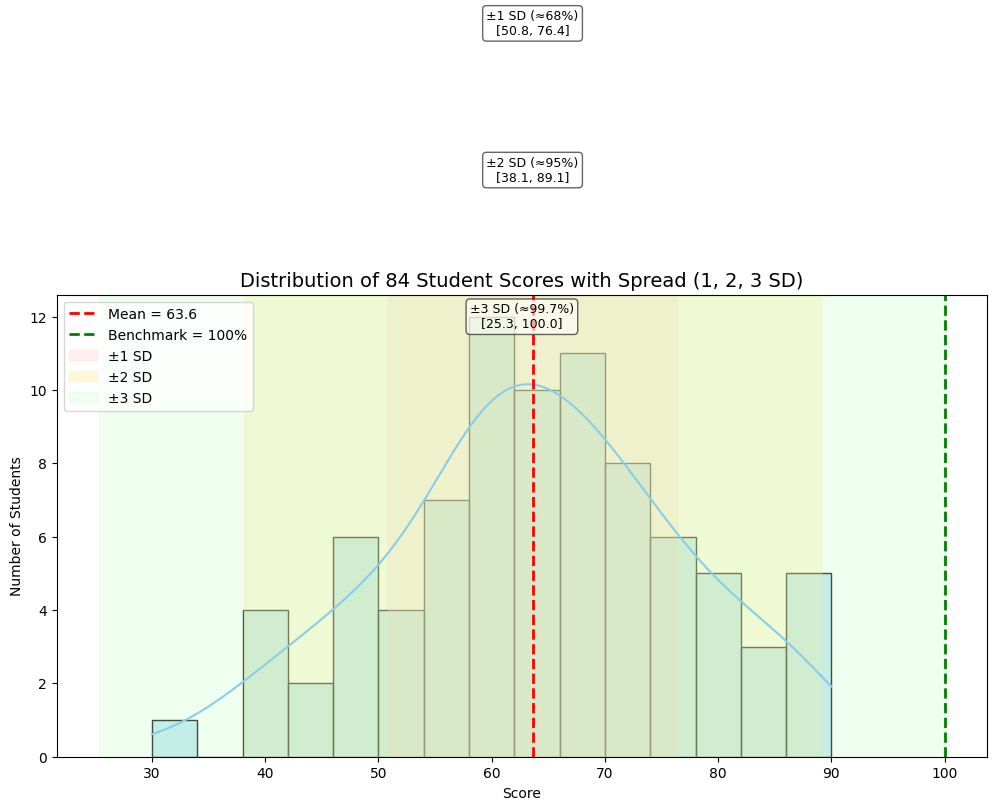

In [ ]:
# Plot histogram
plt.figure(figsize=(12,6))
sns.histplot(df['Score'], bins=15, kde=True, color="skyblue", edgecolor="black")

# Add mean line
plt.axvline(mean_value, color="red", linestyle="--", linewidth=2, label=f"Mean = {mean_value:.1f}")

# Add benchmark line (100%)
plt.axvline(100, color="green", linestyle="--", linewidth=2, label="Benchmark = 100%")

# Define SD ranges with expected percentages
sd_info = [
    (1, "#ffcccc", "±1 SD", "≈68%"),
    (2, "#ffe680", "±2 SD", "≈95%"),
    (3, "#ccffcc", "±3 SD", "≈99.7%")
]

# Shade & annotate SD ranges
for k, color, label, pct, ypos in zip(
    [1,2,3], 
    ["#ffcccc", "#ffe680", "#ccffcc"], 
    ["±1 SD", "±2 SD", "±3 SD"],
    ["≈68%", "≈95%", "≈99.7%"],
    [20, 16, 12]   # adjust annotation height
):
    min_val = mean_value - k*std_dev_value
    max_val = min(mean_value + k*std_dev_value, 100)  # cap at 100
    plt.axvspan(min_val, max_val, color=color, alpha=0.3, label=label)

    # Add text label
    plt.text((min_val+max_val)/2, ypos, 
             f"{label} ({pct})\n[{min_val:.1f}, {max_val:.1f}]", 
             ha="center", va="center", fontsize=9, 
             bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="black", alpha=0.6))

# Labels and title
plt.title("Distribution of 84 Student Scores with Spread (1, 2, 3 SD)", fontsize=14)
plt.xlabel("Score")
plt.ylabel("Number of Students")
plt.legend()

plt.show()



**Examination Performance Report**

**Dataset**: 84 AI Engineering Students

**Benchmark**: 100%

**Mean Score**: 64%

**Standard Deviation (SD)**: 13

**Variance**: 163

**Coefficient of Variation (CV)**: 20%

**Overview of Results**

* The **average score** is **64%**, which is **36 points below the benchmark** (100%).
* The **spread of scores** (SD = 13) indicates *moderate variability* in student performance.
* The **relative spread (CV = 20%)** shows performance consistency is fair but with noticeable gaps.


a) Benchmarking Performance

* The majority of students are **far below the 100% benchmark**.
* The **mean of 64%** suggests the exam was challenging relative to the standard.

b) Student Grouping by SD

* **Within ±1 SD (\~68%)**: These are the *typical performers*.
* **Above +2 SD (\~5%)**: High achievers who may deserve recognition or enrichment tasks.
* **Below –2 SD (\~5%)**: Struggling students needing extra support.

c) Grading Implications

* Scores within ±1 SD → could be considered **average grade (C range)**.
* Scores > +1 SD  - **higher grades (A–B range)**.
* Scores < –1 SD  - **lower grades (D–F range)**.
* This makes grading **data-driven** instead of arbitrary.

d) Exam Design Feedback

* A **moderate spread (SD = 13)** suggests the exam **successfully differentiated** between student abilities.
* However, since **no students reached the benchmark**, the exam may have been **too difficult** or covered areas not well mastered.


**Recommendations for Upcoming Examinations**

1. **Adjust Exam Difficulty**: Ensure the benchmark (100%) is realistically achievable by top students.
2. **Use Score Distributions for Grading**: Apply SD-based ranges to set fair cut-offs.
3. **Targeted Support**:

   * Identify students **below –1 SD** for remedial classes.
   * Encourage students **above +1 SD** with advanced challenges.
4. **Review Curriculum Alignment**: Reassess if teaching content matches exam coverage.




#### **percentiles, interquartile range (IQR), and outlier detection**

In [ ]:
# Extract scores
scores = df['Score'].values

# # Quartiles using Percentiles
# q1 = np.percentile(scores, 25)
# q2 = np.percentile(scores, 50)  # median
# q3 = np.percentile(scores, 75)

# or

# Quartiles using quantile
q1 = np.quantile(scores, 0.25)
q2 = np.quantile(scores, 0.50)  # median
q3 = np.quantile(scores, 0.75)

print(f"Q1 - {q1}")
print(f"Q2 - {q2}")
print(f"Q3 - {q3}")

Q1 - 56.75
Q2 - 63.0
Q3 - 72.0


**Interpretation**

**Q1 (0.25 quantile)**

 - This is the 25th percentile.

 - 25% of students scored below Q1, and 75% scored above Q1.

In our class, Q1 = 56.8. Meaning that about 21 out of 84 students scored 56 or lower.

**Q2 (0.50 quantile, Median)**

 - This is the middle value when all scores are sorted.

 - 50% of students scored below Q2, and 50% scored above Q2.

In our class, Q2 = 63.0. Meaning that the typical student score is about 63.

**Q3 (0.75 quantile)**

 - This is the 75th percentile.

 - 75% of students scored below Q3, and 25% scored above Q3.

In your dataset, Q3 = 72.0. Meaning that only the top 25% of students scored above 72.

IN summary,these three quantiles divide your students into four groups (quartiles)

- Bottom 25% scored below approximately 57

- Next 25% scored between 57 and 63

- Next 25% scored between 63 and 72

- Top 25% scored above 72

**Interquartile Range**

In [ ]:
# Interquartile Range
iqr = q3 - q1
print(f"IQR - {iqr}")

IQR - 15.25


In [ ]:
# Outlier thresholds (Tukey’s rule)
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

print(f"Lower Bound - {lower_bound}")
print(f"Upper Bound - {upper_bound}")

Lower Bound - 33.875
Upper Bound - 94.875


In [ ]:
# Detect outliers
outliers = scores[(scores < lower_bound) | (scores > upper_bound)]
print(f"List of outlier scores --> {outliers}")

List of outlier scores --> [30.]


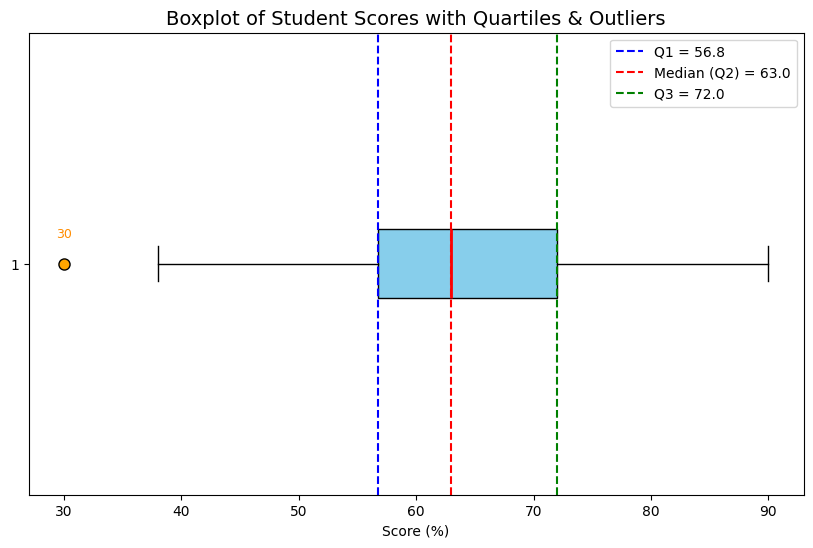

Q1 (25th percentile): 56.75
Q2 (Median, 50th percentile): 63.00
Q3 (75th percentile): 72.00
IQR (Q3 - Q1): 15.25
Lower Bound for Outliers: 33.88
Upper Bound for Outliers: 94.88
Outliers Detected: [np.float64(30.0)]


In [ ]:

plt.figure(figsize=(10, 6))
box = plt.boxplot(scores, vert=False, patch_artist=True,
                  boxprops=dict(facecolor="skyblue", color="black"),
                  medianprops=dict(color="red", linewidth=2),
                  whiskerprops=dict(color="black"),
                  capprops=dict(color="black"),
                  flierprops=dict(markerfacecolor="orange", marker='o', markersize=8, linestyle="none"))

# Annotate Quartiles
plt.axvline(q1, color="blue", linestyle="--", label=f"Q1 = {q1:.1f}")
plt.axvline(q2, color="red", linestyle="--", label=f"Median (Q2) = {q2:.1f}")
plt.axvline(q3, color="green", linestyle="--", label=f"Q3 = {q3:.1f}")

# Annotate outliers if present
for outlier in outliers:
    plt.text(outlier, 1.05, f"{outlier:.0f}", ha="center", va="bottom", color="darkorange", fontsize=9)

# Titles and labels
plt.title("Boxplot of Student Scores with Quartiles & Outliers", fontsize=14)
plt.xlabel("Score (%)")
plt.legend()

plt.show()

# Print results
print(f"Q1 (25th percentile): {q1:.2f}")
print(f"Q2 (Median, 50th percentile): {q2:.2f}")
print(f"Q3 (75th percentile): {q3:.2f}")
print(f"IQR (Q3 - Q1): {iqr:.2f}")
print(f"Lower Bound for Outliers: {lower_bound:.2f}")
print(f"Upper Bound for Outliers: {upper_bound:.2f}")
print(f"Outliers Detected: {list(outliers)}")


**Skewness**

In [ ]:

# Calculate skewness
skewness = skew(scores)

print(f"Skewness: {skewness:.3f}")

# Interpretation
if skewness > 0:
    print("The distribution is positively skewed (tail to the right  meaning more students scored below the mean).")
elif skewness < 0:
    print("The distribution is negatively skewed (tail to the left meaning more students scored above the mean).")
else:
    print("The distribution is symmetric (scores are evenly spread around the mean).")

Skewness: -0.163
The distribution is negatively skewed (tail to the left meaning more students scored above the mean).


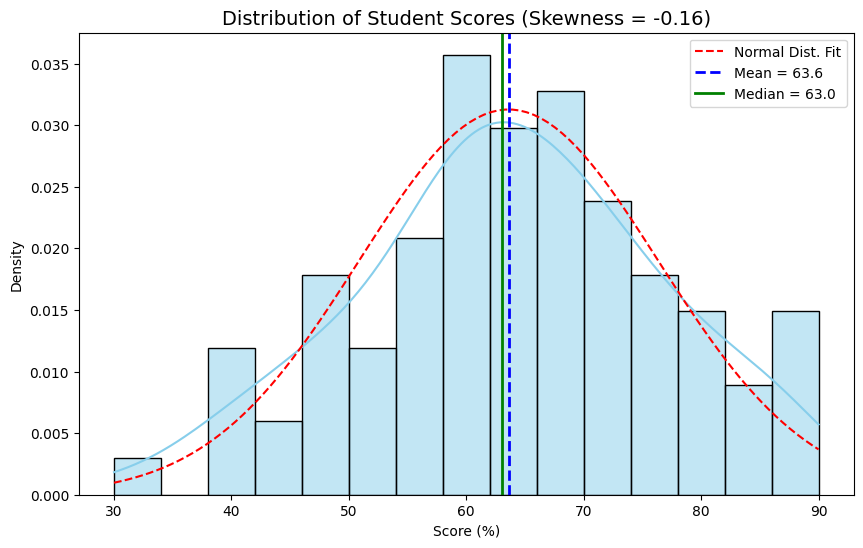

In [ ]:
plt.figure(figsize=(10,6))
sns.histplot(scores, bins=15, kde=True, color="skyblue", stat="density", edgecolor="black")

# Fit a normal distribution
mu, sigma = np.mean(scores), np.std(scores)
x = np.linspace(min(scores), max(scores), 100)
plt.plot(x, norm.pdf(x, mu, sigma), 'r--', label="Normal Dist. Fit")

# Add mean and median lines
plt.axvline(mu, color='blue', linestyle='--', linewidth=2, label=f"Mean = {mu:.1f}")
plt.axvline(np.median(scores), color='green', linestyle='-', linewidth=2, label=f"Median = {np.median(scores):.1f}")

# Title and labels
plt.title(f"Distribution of Student Scores (Skewness = {skewness:.2f})", fontsize=14)
plt.xlabel("Score (%)")
plt.ylabel("Density")
plt.legend()

plt.show()


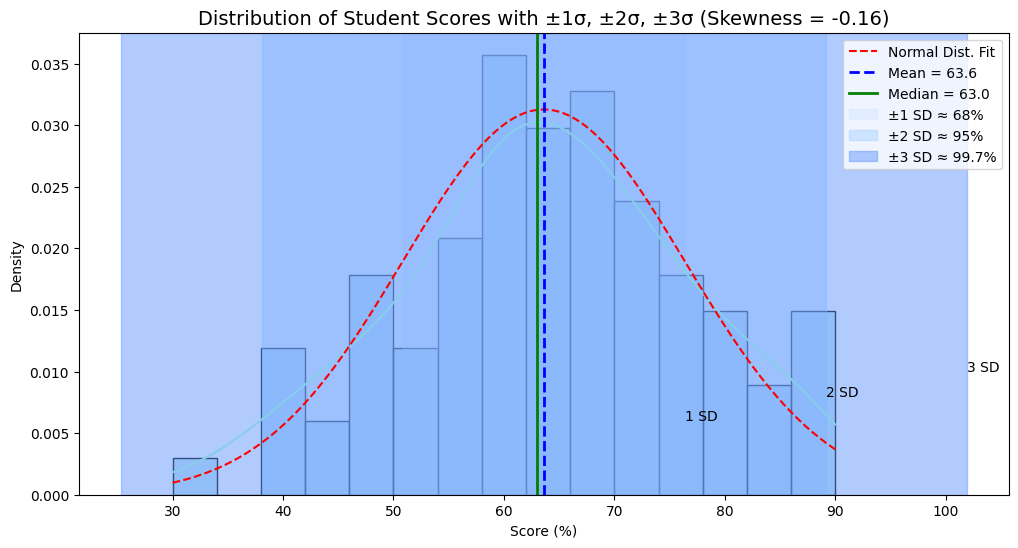

In [ ]:
kewness = skew(scores)

# Plot histogram with KDE
plt.figure(figsize=(12,6))
sns.histplot(scores, bins=15, kde=True, color="skyblue", stat="density", edgecolor="black")

# Fit normal distribution curve
x = np.linspace(min(scores), max(scores), 200)
plt.plot(x, norm.pdf(x, mu, sigma), 'r--', label="Normal Dist. Fit")

# Mean and Median
plt.axvline(mu, color='blue', linestyle='--', linewidth=2, label=f"Mean = {mu:.1f}")
plt.axvline(np.median(scores), color='green', linestyle='-', linewidth=2, label=f"Median = {np.median(scores):.1f}")

# Shaded regions for 1SD, 2SD, 3SD
colors = ["#c6e2ff", "#99ccff", "#6699ff"]  # lighter → darker shades
for i, perc in zip([1,2,3], [68,95,99.7]):
    plt.axvspan(mu - i*sigma, mu + i*sigma, alpha=0.2 + i*0.1, color=colors[i-1],
                label=f"±{i} SD ≈ {perc}%")
    # Annotate range
    plt.text(mu + i*sigma, 0.004 + (i*0.002), f"{i} SD", color="black", fontsize=10)

# Title and labels
plt.title(f"Distribution of Student Scores with ±1σ, ±2σ, ±3σ (Skewness = {skewness:.2f})", fontsize=14)
plt.xlabel("Score (%)")
plt.ylabel("Density")
plt.legend()

plt.show()

**Kurtosis**

In [ ]:
# Calculate kurtosis (Fisher=False gives "Pearson" definition where normal=3)
kurt_pearson = kurtosis(scores, fisher=False)  
kurt_excess = kurtosis(scores, fisher=True)   # Excess kurtosis (normal=0)

print(f"Kurtosis (Pearson definition): {kurt_pearson:.3f}")
print(f"Excess Kurtosis: {kurt_excess:.3f}")

# Interpretation
if kurt_excess > 0:
    print("The distribution is Leptokurtic (sharper peak, heavier tails than normal).")
elif kurt_excess < 0:
    print("The distribution is Platykurtic (flatter peak, lighter tails than normal).")
else:
    print("The distribution is Mesokurtic (similar to normal distribution).")


Kurtosis (Pearson definition): 2.707
Excess Kurtosis: -0.293
The distribution is Platykurtic (flatter peak, lighter tails than normal).


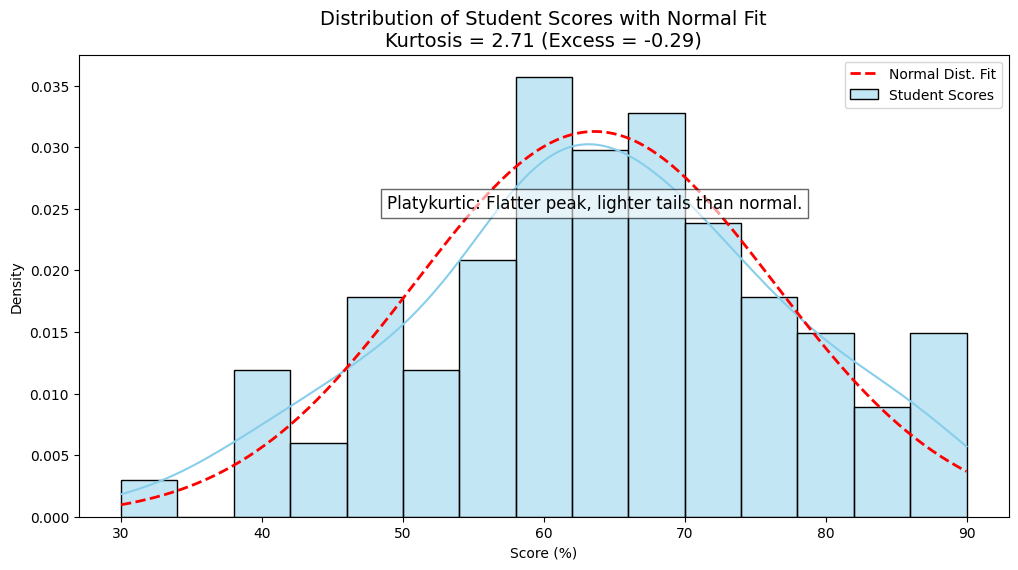

In [ ]:

# Interpretation
if kurt_excess > 0:
    interpretation = "Leptokurtic: Sharper peak, heavier tails than normal."
elif kurt_excess < 0:
    interpretation = "Platykurtic: Flatter peak, lighter tails than normal."
else:
    interpretation = "Mesokurtic: Similar to normal distribution."

# Plot histogram with KDE
plt.figure(figsize=(12,6))
sns.histplot(scores, bins=15, kde=True, color="skyblue", stat="density", edgecolor="black", label="Student Scores")

# Normal distribution curve for comparison
x = np.linspace(min(scores), max(scores), 200)
plt.plot(x, norm.pdf(x, mu, sigma), 'r--', linewidth=2, label="Normal Dist. Fit")

# Title with kurtosis values
plt.title(f"Distribution of Student Scores with Normal Fit\n"
          f"Kurtosis = {kurt_pearson:.2f} (Excess = {kurt_excess:.2f})", fontsize=14)

# Annotate interpretation inside the plot
plt.text(mu, max(norm.pdf(x, mu, sigma))*0.8, interpretation,
         fontsize=12, color="black", ha="center", bbox=dict(facecolor="white", alpha=0.6))

plt.xlabel("Score (%)")
plt.ylabel("Density")
plt.legend()
plt.show()